# 0.0 Imports

In [94]:
import pandas       as pd
import numpy        as np
import seaborn      as sns
import sweetviz     as sv

from matplotlib         import pyplot                   as plt
from sklearn            import model_selection          as ms
from ydata_profiling    import ProfileReport

from ipywidgets         import HTML, Button, widgets



In [95]:
df_train_all    =   pd.read_csv('./datasets/train.csv')
df_test         =   pd.read_csv('./datasets/test.csv')

In [96]:
df_train_y = df_train_all['Satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)
df_train = df_train_all.drop(columns=['Satisfaction'])

# 1.0 Data Description

In [97]:
df1 = df_train_all.copy()

## 1.1 Data Dimension

In [98]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 103904
Number of columns: 24


## 1.2 Analyze data

In [99]:
df1_original = df1.copy()  # Cria uma cópia do DataFrame original

# Realiza as operações de limpeza nos nomes das colunas
df1.columns = df1.columns.str.lower()
df1.columns = df1.columns.str.strip()
df1.columns = df1.columns.str.replace(' ', '_')
# df1         = df1.drop(columns={'id'})

In [100]:
df1.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,...,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


In [101]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
store_distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
instore_wifi,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
open/close_time_convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
easy_of_online_shopping,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
store_location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
toilet_cleaning,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
dressing_room,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
waiting_room,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


### 1.2.1 Changing values in string columns to integer numbers

In [102]:
# divides the dataframe into integer and string values.
df1_int     =   df1.select_dtypes(include=['int64', 'float64'])
df1_string  =   df1.select_dtypes(exclude=['int64', 'float64'])

In [103]:
# # change colum gender to integer value
df1['gender'] = df1['gender'].apply(lambda x: 0 if x == 'Female' else 1)

# # change colum "customer_type" to integer value
df1['customer_type'] = df1['customer_type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)

# # change colum "type_of_purchase" to integer value
df1['type_of_purchase'] = df1['type_of_purchase'].apply(lambda x: 1 if x == 'Gift' else 0)

# # change colum "store_size" to integer value
df1['store_size'] = df1['store_size'].apply(lambda x: 2 if x == 'Large' else ( 1 if x == 'Medium' else 0 ))

# # change colum "satisfaction" to integer value
df1['satisfaction'] = df1['satisfaction'].apply(lambda x: 0 if x == 'Neutral or Dissatisfaction' else 1)


## 1.3 Check NAs

In [104]:
df1.isna().sum()

id                              0
gender                          0
customer_type                   0
age                             0
type_of_purchase                0
store_size                      0
store_distance                  0
instore_wifi                    0
open/close_time_convenient      0
easy_of_online_shopping         0
store_location                  0
toilet_cleaning                 0
dressing_room                   0
waiting_room                    0
kids_entertainment              0
seller_service                  0
showroom                        0
self-store                      0
purchase_service                0
store_service                   0
cleanliness                     0
carrier_delay_in_minutes        0
delivery_delay_in_minutes     310
satisfaction                    0
dtype: int64

## 1.4 Check NAs
**Notice:** We detected that the column `delivery_delay_in_minutes` has null values.

In [105]:
df_delivery_delay_in_minutes = df1[df1['delivery_delay_in_minutes'].isnull()]

In [106]:
df1['delivery_delay_in_minutes'].value_counts()

delivery_delay_in_minutes
0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: count, Length: 455, dtype: int64

## 1.5 Correlated Columns

### 1.5.1 Correlated colum ``satisfaction``

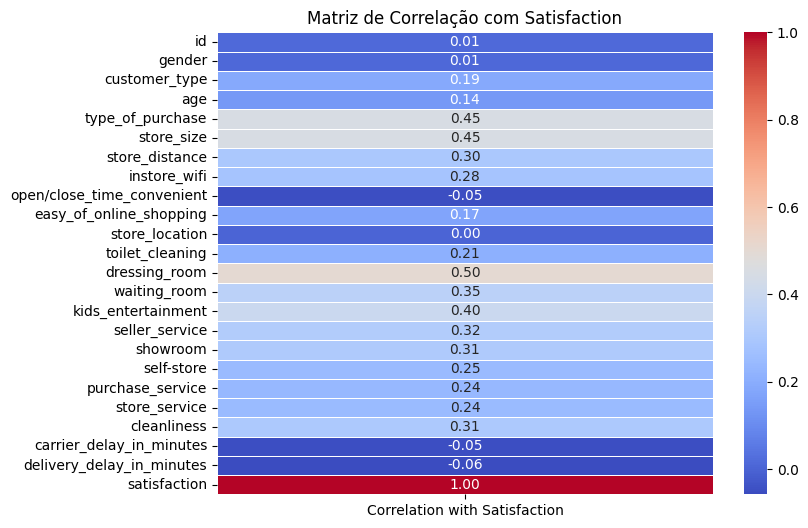

In [107]:
# Assuming that 'satisfaction' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['satisfaction'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with Satisfaction']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com Satisfaction')
plt.show()

### 1.5.1 Correlated colum ``store_location``

**Notice:** We identified that 'instore_wifi', 'open/close_time_convenient' and 'easy_of_online_shopping' are more related to store_location

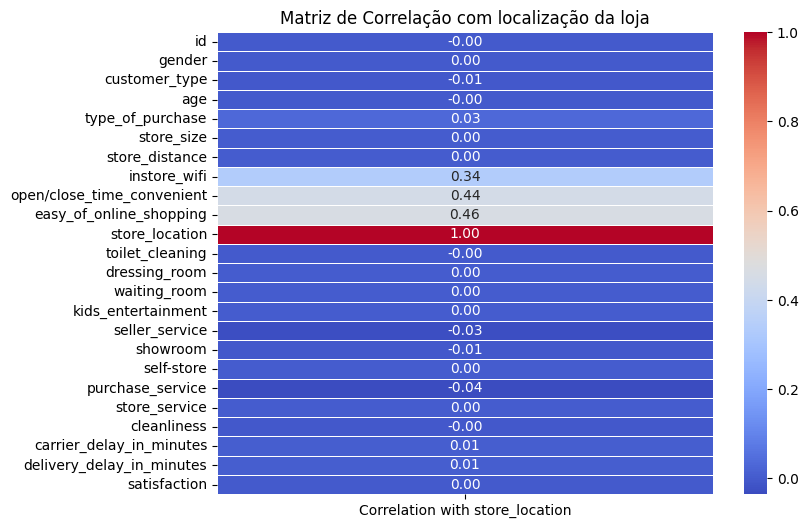

In [108]:
# Assuming that 'store_location' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['store_location'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with store_location']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com localização da loja')
plt.show()

### 1.5.2 Correlated colum ``customer_type``

**Notice:** We identified that 'age' and 'type_of_purchase' are more related to 'customer_type'

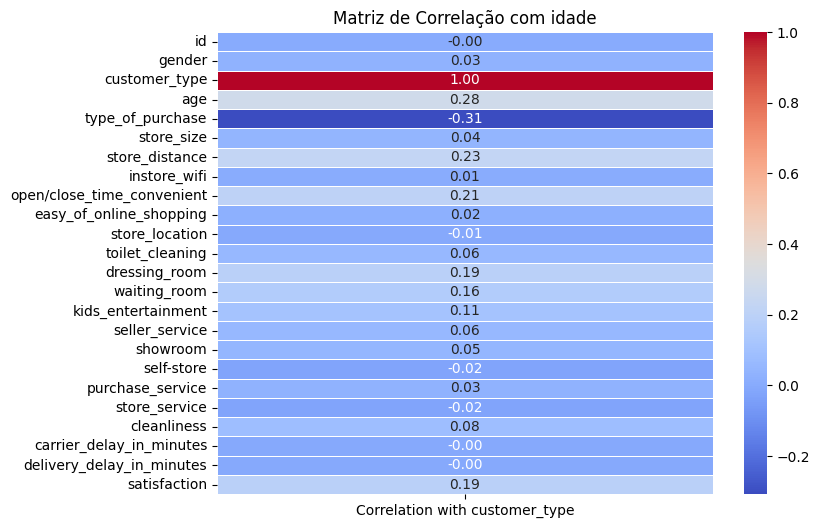

In [109]:
# Assuming that 'customer_type' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['customer_type'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with customer_type']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.3 Correlated colum ``carrier_delay_in_minutes``

**Notice:** We identified that 'delivery_delay_in_minutes' are more related to 'carrier_delay_in_minutes'

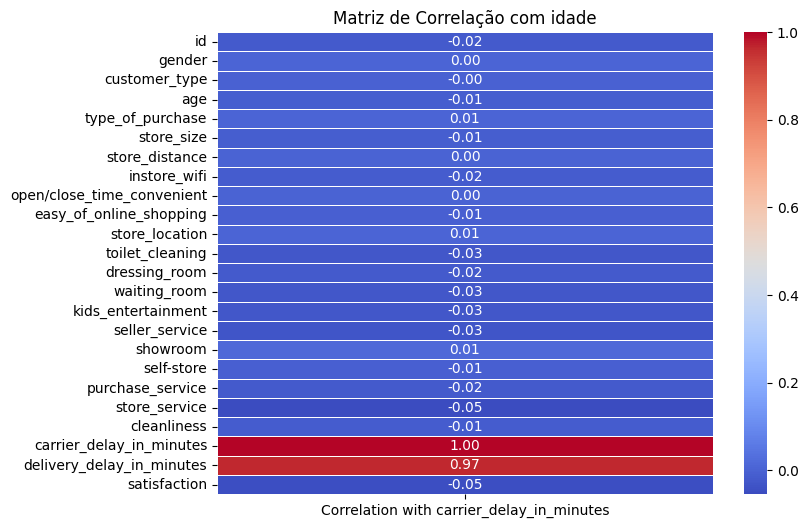

In [110]:
# Assuming that 'carrier_delay_in_minutes' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['carrier_delay_in_minutes'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with carrier_delay_in_minutes']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.4 Correlated colum ``delivery_delay_in_minutes``

**Notice:** We identified that 'carrier_delay_in_minutes' are more related to 'delivery_delay_in_minutes'

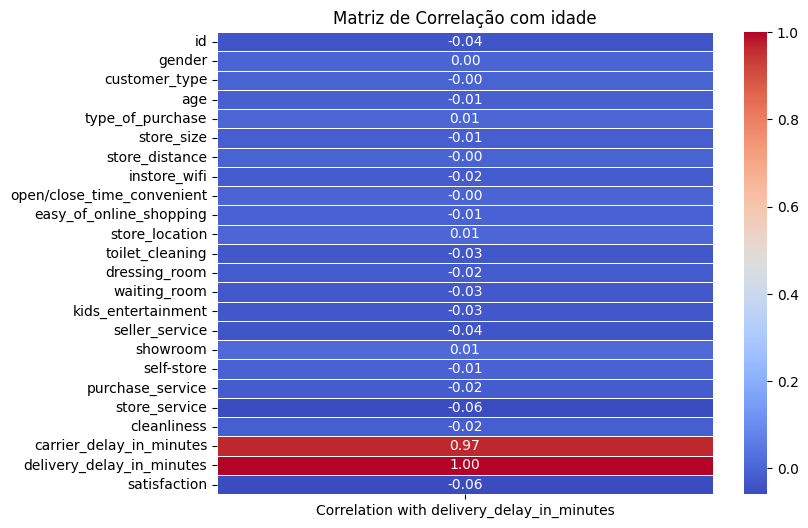

In [111]:
# Assuming that 'delivery_delay_in_minutes' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['delivery_delay_in_minutes'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with delivery_delay_in_minutes']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.5 Correlated colum ``type_of_purchase``

**Notice:** We identified that 'store_size', 'customer_type' and 'store_distance' are more related to 'type_of_purchase'

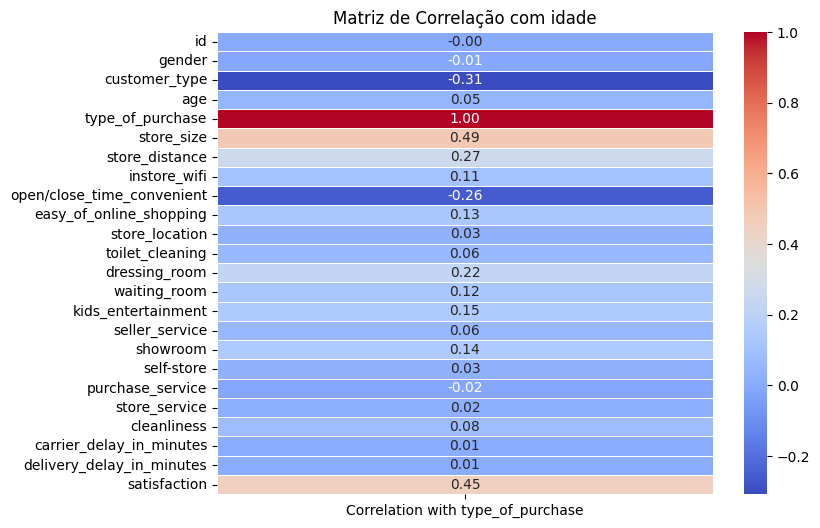

In [112]:
# Assuming that 'type_of_purchase' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['type_of_purchase'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with type_of_purchase']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.6 Correlated colum ``store_size``

**Notice:** We identified that 'store_distance', 'type_of_purchase' and 'dressing_room' are more related to 'store_size'

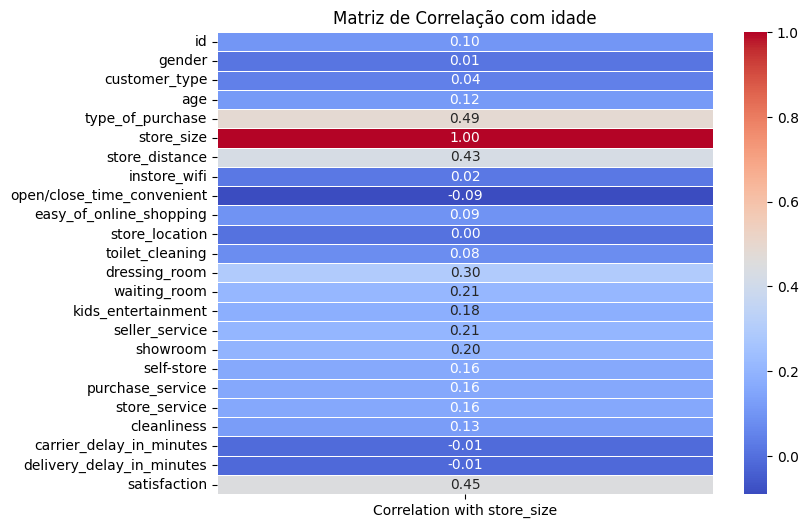

In [113]:
# Assuming that 'store_size' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['store_size'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with store_size']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.7 Correlated colum ``dressing_room``

**Notice:** We identified that 'waiting_room', 'easy_of_online_shopping', 'instore_wifi', 'cleanliness', 'kids_entertainment' and 'store_size' are more related to 'dressing_room'

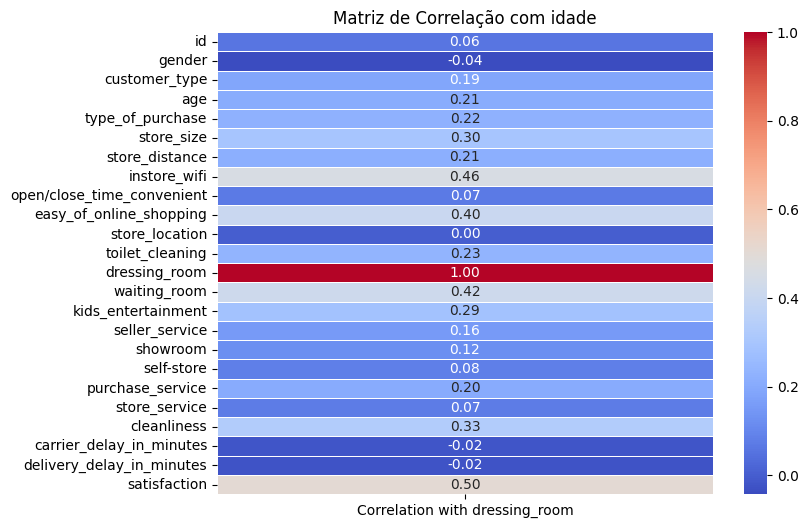

In [114]:
# Assuming that 'dressing_room' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['dressing_room'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with dressing_room']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

## 1.6 Pandas Profiling

In [115]:
# profile = ProfileReport(df1, title="Profiling Report")

In [116]:
# profile.to_file('ProfilingReport.html')

## 1.7 SweetViz

### 1.7.1 GerandoRelatorio SweetViz

In [117]:
# my_report = sv.analyze(source=df1, target_feat='satisfaction', pairwise_analysis='on')
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

## 1.8 Univariate analysis

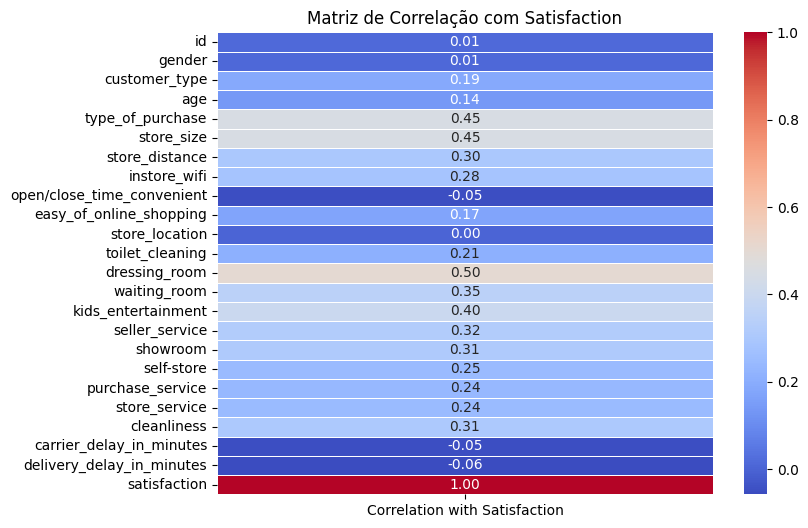

In [118]:
# Assuming that 'satisfaction' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['satisfaction'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with Satisfaction']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com Satisfaction')
plt.show()

In [119]:
df1.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes',
       'satisfaction'],
      dtype='object')

### 1.8.1 Column - Gender

In [120]:
# gender = 0 = Female and 1 = Male
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'gender', 'satisfaction']].groupby(['gender', 'satisfaction']).count().reset_index()
df_aux.columns = ['gender', 'satisfaction', 'count']

df_aux['gender']        =   df_aux['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')
df_aux['satisfaction']  =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,gender,satisfaction,count
0,Female,No Satisfaction,30193
1,Female,Satisfaction,22534
2,Male,No Satisfaction,28686
3,Male,Satisfaction,22491


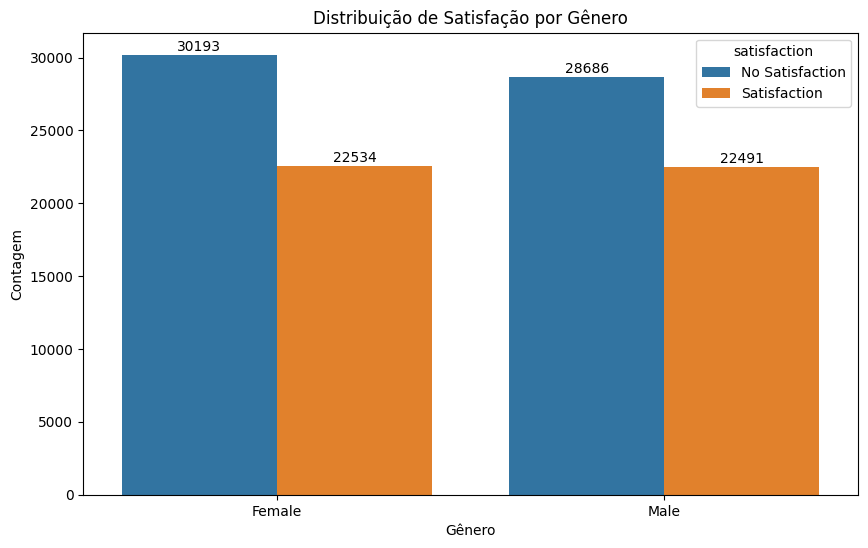

In [121]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='gender', y='count', hue='satisfaction', data=df_aux)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# Adicionar valores exatos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 3), textcoords='offset points', ha='center')

# Mostrar o gráfico
plt.show()

### 1.8.2 Column - customer_type

In [122]:
df1['customer_type'].unique()

array([1, 0], dtype=int64)

In [123]:
# customer_type = 0 = disloyal Customer and 1 = Loyal Customer
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'customer_type', 'satisfaction']].groupby(['customer_type', 'satisfaction']).count().reset_index()
df_aux.columns = ['customer_type', 'satisfaction', 'count']

df_aux['customer_type']     =   df_aux['customer_type'].apply(lambda x: 'Disloyal Customer' if x == 0 else 'Loyal Customer')
df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,customer_type,satisfaction,count
0,Disloyal Customer,No Satisfaction,14489
1,Disloyal Customer,Satisfaction,4492
2,Loyal Customer,No Satisfaction,44390
3,Loyal Customer,Satisfaction,40533


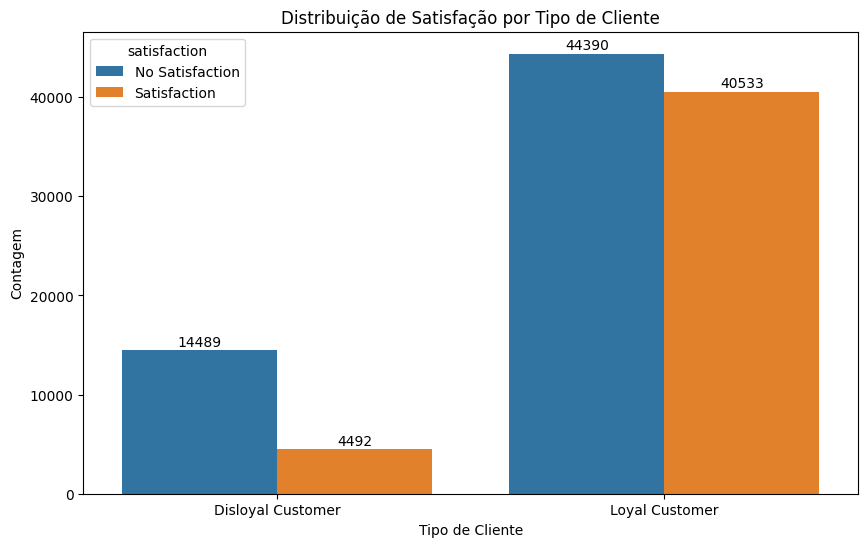

In [124]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='customer_type', y='count', hue='satisfaction', data=df_aux)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Contagem')

# Adicionar valores exatos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 3), textcoords='offset points', ha='center')

# Mostrar o gráfico
plt.show()

### 1.8.3 Column - age

In [125]:
df1['age'].sort_values().unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 85], dtype=int64)

In [126]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'age', 'satisfaction']].groupby(['age', 'satisfaction']).count().reset_index()
df_aux.columns = ['age', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,age,satisfaction,count
0,7,No Satisfaction,506
1,7,Satisfaction,56
2,8,No Satisfaction,571
3,8,Satisfaction,69
4,9,No Satisfaction,597
...,...,...,...
145,79,Satisfaction,12
146,80,No Satisfaction,63
147,80,Satisfaction,15
148,85,No Satisfaction,14


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


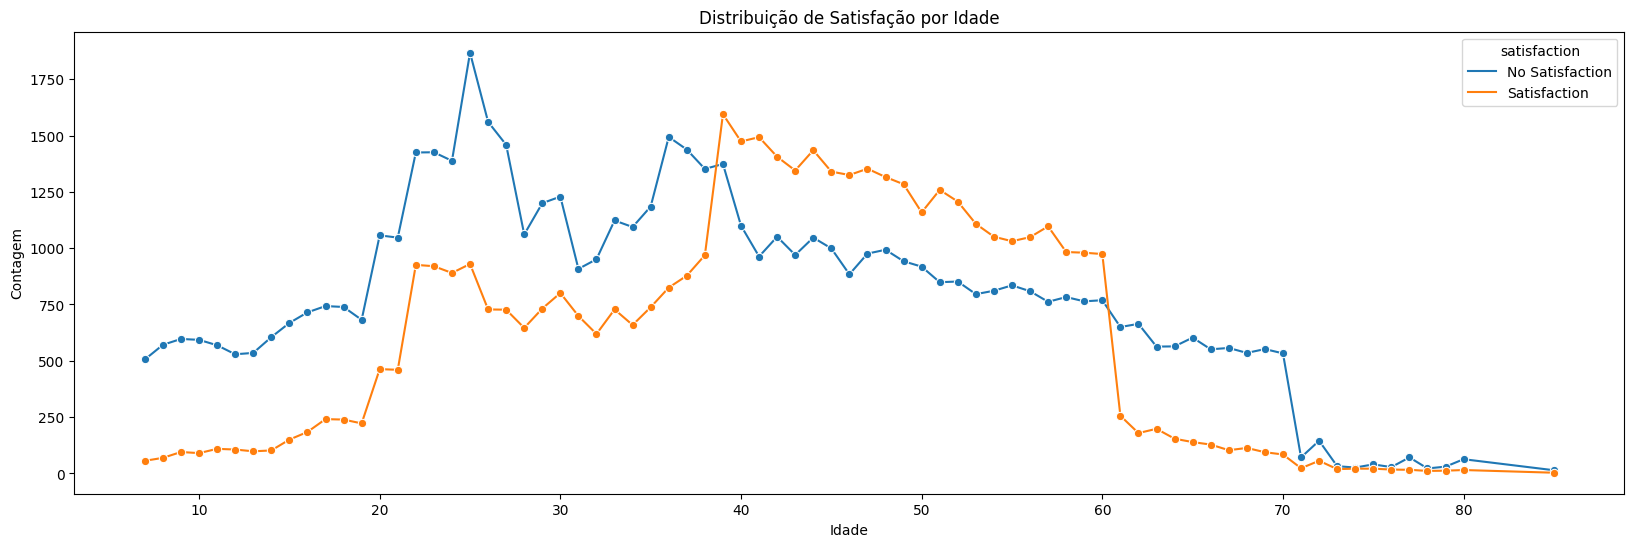

In [127]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='age', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

### 1.8.4 Column - type_of_purchase

In [128]:
df1['type_of_purchase'].unique()

array([0, 1], dtype=int64)

In [129]:
# type_of_purchase: 0 = Personal and 1 = Gift
# satisfaction: 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'type_of_purchase', 'satisfaction']].groupby(['type_of_purchase', 'satisfaction']).count().reset_index()
df_aux.columns = ['type_of_purchase', 'satisfaction', 'count']

df_aux['type_of_purchase']     =   df_aux['type_of_purchase'].apply(lambda x: 'Personal' if x == 0 else 'Gift')
df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,type_of_purchase,satisfaction,count
0,Personal,No Satisfaction,28970
1,Personal,Satisfaction,3279
2,Gift,No Satisfaction,29909
3,Gift,Satisfaction,41746


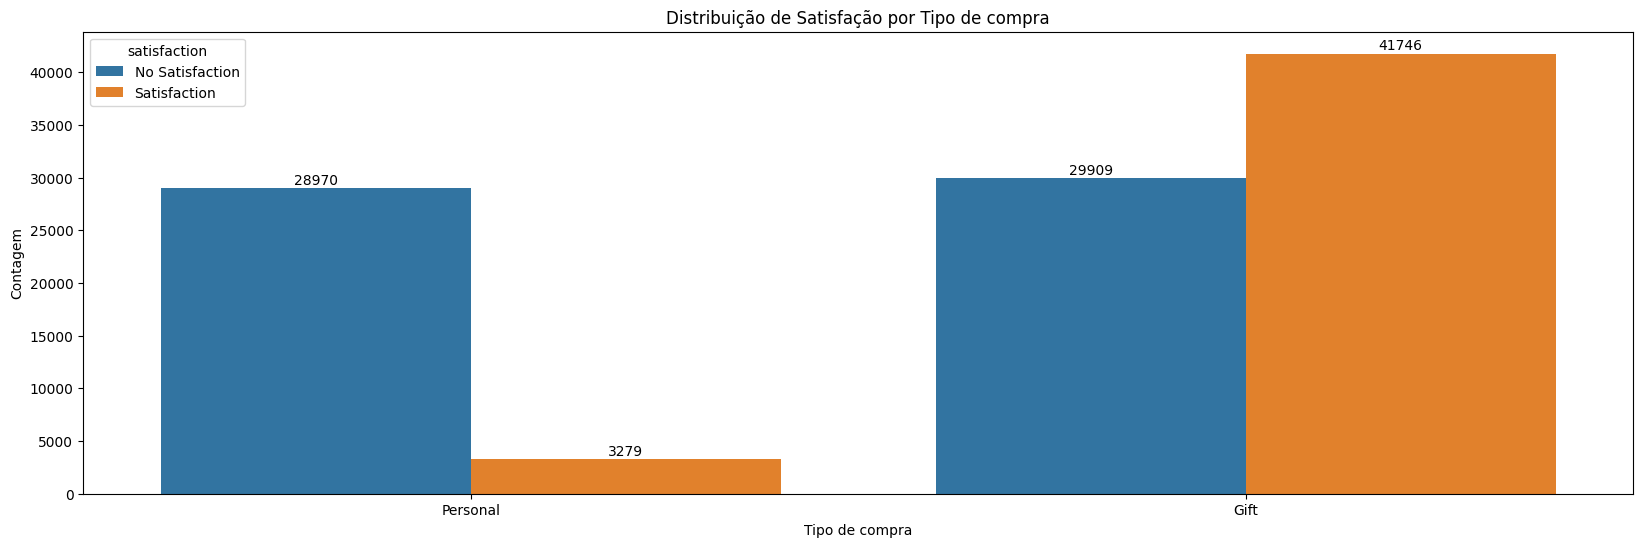

In [130]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='type_of_purchase', y='count', hue='satisfaction', data=df_aux)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Tipo de compra')
plt.xlabel('Tipo de compra')
plt.ylabel('Contagem')

# Adicionar valores exatos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 3), textcoords='offset points', ha='center')

# Mostrar o gráfico
plt.show()

### 1.8.5 Column - store_size

In [131]:
df1['store_size'].unique()

array([0, 2, 1], dtype=int64)

In [132]:
# store_size: 0 = Small, 1 = Medium and 2 = Large
# satisfaction: 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'store_size', 'satisfaction']].groupby(['store_size', 'satisfaction']).count().reset_index()
df_aux.columns = ['store_size', 'satisfaction', 'count']

df_aux['store_size'] = df_aux['store_size'].apply(lambda x: 'Small' if x == 0 else ('Medium' if x == 1 else 'Large'))
df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,store_size,satisfaction,count
0,Small,No Satisfaction,5650
1,Small,Satisfaction,1844
2,Medium,No Satisfaction,38044
3,Medium,Satisfaction,8701
4,Large,No Satisfaction,15185
5,Large,Satisfaction,34480


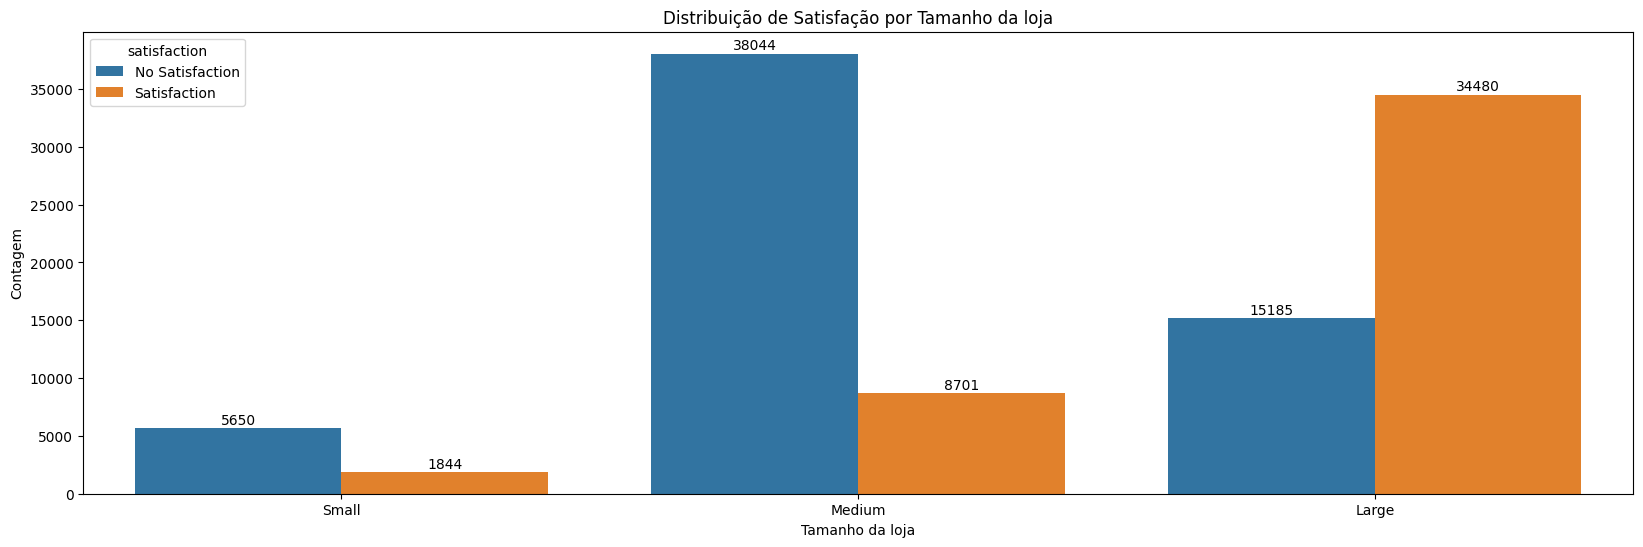

In [133]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='store_size', y='count', hue='satisfaction', data=df_aux)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Tamanho da loja')
plt.xlabel('Tamanho da loja')
plt.ylabel('Contagem')

# Adicionar valores exatos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 3), textcoords='offset points', ha='center')

# Mostrar o gráfico
plt.show()

### 1.8.6 Column - store_distance

In [134]:
df1['store_distance'].unique()

array([ 460,  235, 1142, ...,  974, 1479,  400], dtype=int64)

In [135]:
# satisfaction: 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'store_distance', 'satisfaction']].groupby(['store_distance', 'satisfaction']).count().reset_index()
df_aux.columns = ['store_distance', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,store_distance,satisfaction,count
0,31,No Satisfaction,5
1,31,Satisfaction,3
2,56,No Satisfaction,4
3,56,Satisfaction,4
4,67,No Satisfaction,83
...,...,...,...
7029,4817,Satisfaction,1
7030,4963,No Satisfaction,7
7031,4963,Satisfaction,6
7032,4983,No Satisfaction,3


In [136]:
# Pivotar os dados para ter 'No Satisfaction' e 'Satisfaction' como colunas
df_pivot                                =   df_aux.pivot(index='store_distance', columns='satisfaction', values='count').fillna(0).reset_index()

# Tipo da coluna para inteiro
df_pivot['No Satisfaction']             =   df_pivot['No Satisfaction'].astype('int64')
df_pivot['Satisfaction']                =   df_pivot['Satisfaction'].astype('int64')

# Calcular a porcentagem
df_pivot['total']                       =   df_pivot['No Satisfaction'] + df_pivot['Satisfaction']
df_pivot['porcentagem_insatisfeito']    =   round((df_pivot['No Satisfaction'] / df_pivot['total']) * 100, 2)
df_pivot['porcentagem_satisfeito']      =   round((df_pivot['Satisfaction'] / df_pivot['total']) * 100, 2)

In [137]:
df_pivot[df_pivot['porcentagem_insatisfeito'] < df_pivot['porcentagem_satisfeito']]

satisfaction,store_distance,No Satisfaction,Satisfaction,total,porcentagem_insatisfeito,porcentagem_satisfeito
5,76,0,1,1,0.00,100.00
11,84,15,21,36,41.67,58.33
24,108,23,25,48,47.92,52.08
27,111,0,1,1,0.00,100.00
28,112,2,5,7,28.57,71.43
...,...,...,...,...,...,...
3794,3998,0,8,8,0.00,100.00
3795,3999,0,5,5,0.00,100.00
3796,4000,1,10,11,9.09,90.91
3797,4243,7,11,18,38.89,61.11


In [138]:
df_pivot[df_pivot['porcentagem_insatisfeito'] > df_pivot['porcentagem_satisfeito']]

satisfaction,store_distance,No Satisfaction,Satisfaction,total,porcentagem_insatisfeito,porcentagem_satisfeito
0,31,5,3,8,62.50,37.50
2,67,83,45,128,64.84,35.16
3,73,42,17,59,71.19,28.81
4,74,22,8,30,73.33,26.67
6,77,32,9,41,78.05,21.95
...,...,...,...,...,...,...
3749,3953,6,2,8,75.00,25.00
3765,3969,3,2,5,60.00,40.00
3786,3990,4,3,7,57.14,42.86
3799,4817,4,1,5,80.00,20.00


In [139]:
df_pivot.dtypes

satisfaction
store_distance                int64
No Satisfaction               int64
Satisfaction                  int64
total                         int64
porcentagem_insatisfeito    float64
porcentagem_satisfeito      float64
dtype: object

d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


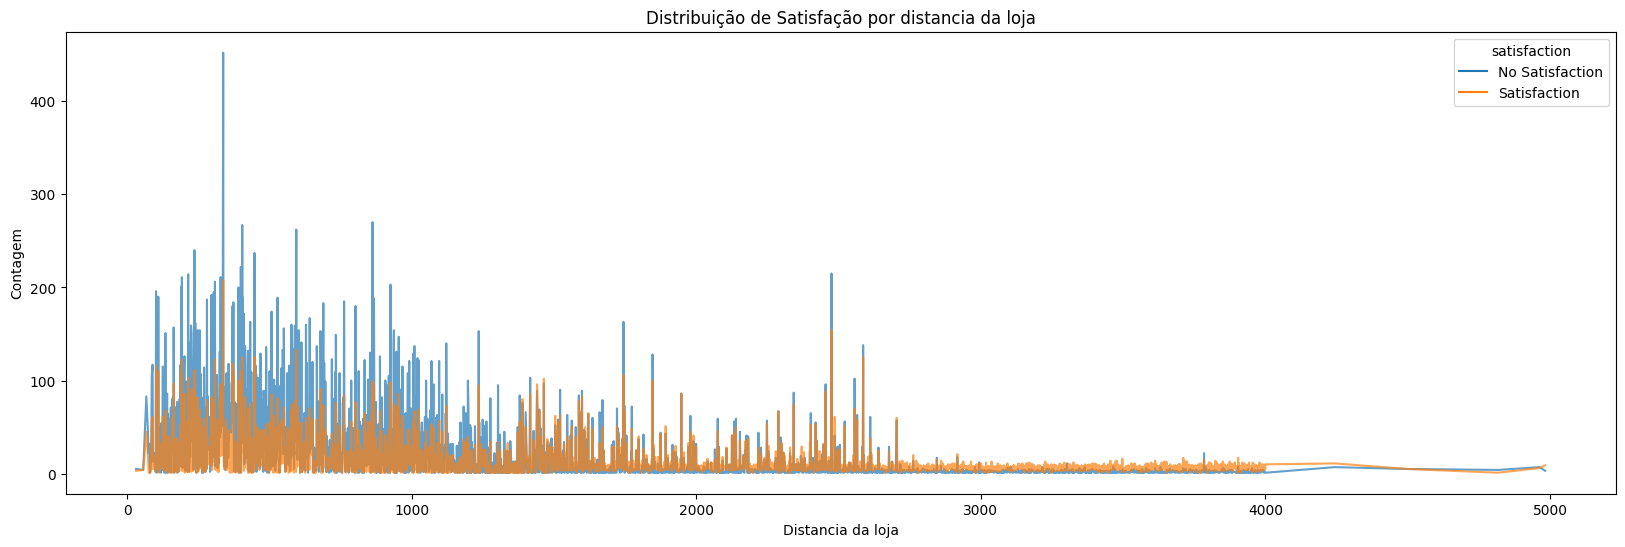

In [140]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='store_distance', y='count', hue='satisfaction', data=df_aux, alpha=0.7)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por distancia da loja')
plt.xlabel('Distancia da loja')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


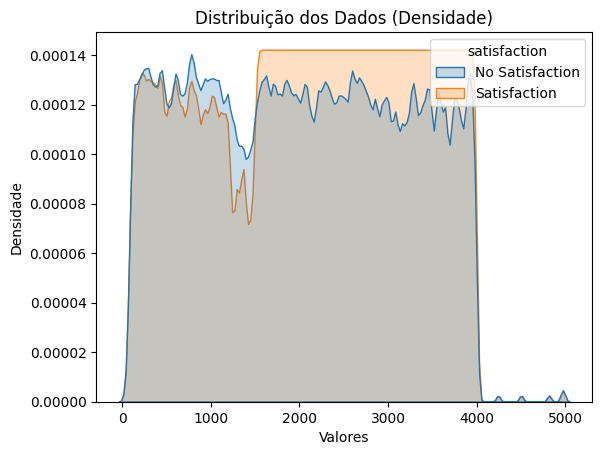

In [141]:
sns.kdeplot(
    data=df_aux,
    x='store_distance',
    hue='satisfaction',
    fill=True,
    color='skyblue',
    bw_adjust=.1
    # multiple='stack',
    # common_norm=False
)

plt.title('Distribuição dos Dados (Densidade)')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()

### 1.8.7 Column - instore_wifi

In [142]:
df1['instore_wifi'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [143]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'instore_wifi', 'satisfaction']].groupby(['instore_wifi', 'satisfaction']).count().reset_index()
df_aux.columns = ['instore_wifi', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,instore_wifi,satisfaction,count
0,0,No Satisfaction,8
1,0,Satisfaction,3095
2,1,No Satisfaction,12034
3,1,Satisfaction,5806
4,2,No Satisfaction,19407
5,2,Satisfaction,6423
6,3,No Satisfaction,19386
7,3,Satisfaction,6482
8,4,No Satisfaction,7938
9,4,Satisfaction,11856


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


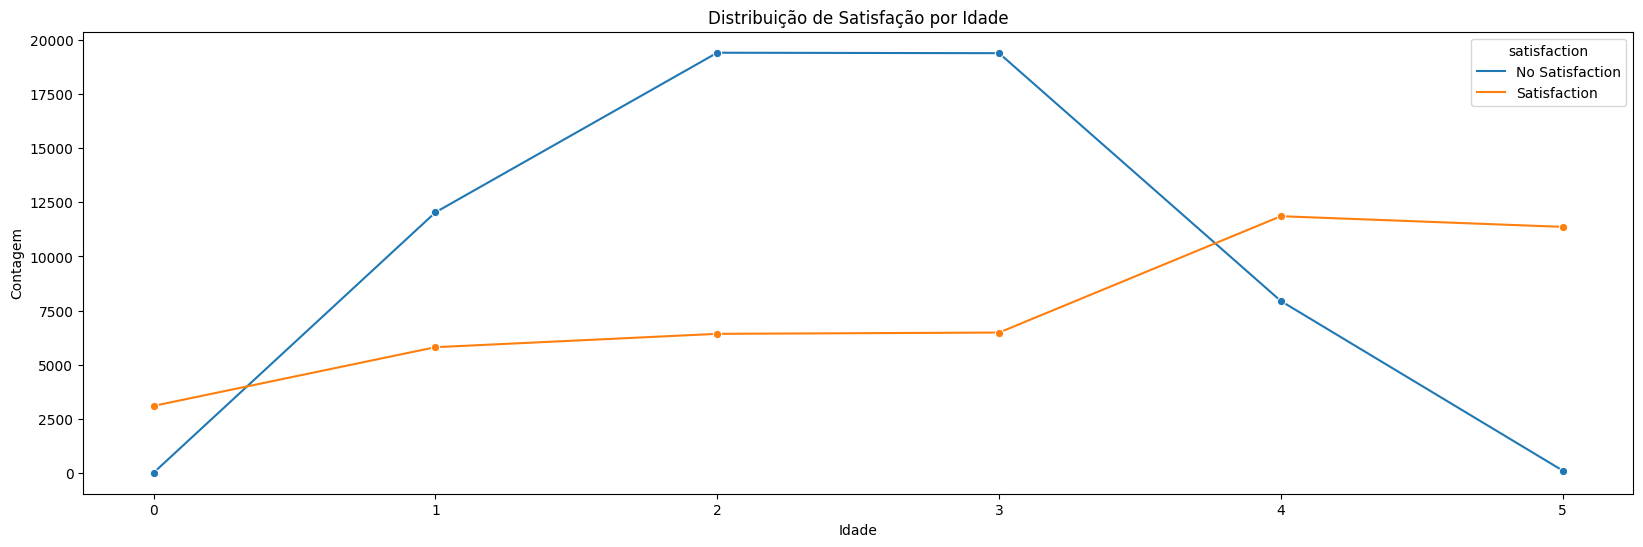

In [144]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='instore_wifi', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

### 1.8.8 Column - open/close_time_convenient

In [145]:
df1['open/close_time_convenient'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [146]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'open/close_time_convenient', 'satisfaction']].groupby(['open/close_time_convenient', 'satisfaction']).count().reset_index()
df_aux.columns = ['open/close_time_convenient', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,open/close_time_convenient,satisfaction,count
0,0,No Satisfaction,2780
1,0,Satisfaction,2520
2,1,No Satisfaction,7957
3,1,Satisfaction,7541
4,2,No Satisfaction,9534
5,2,Satisfaction,7657
6,3,No Satisfaction,10093
7,3,Satisfaction,7873
8,4,No Satisfaction,15640
9,4,Satisfaction,9906


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


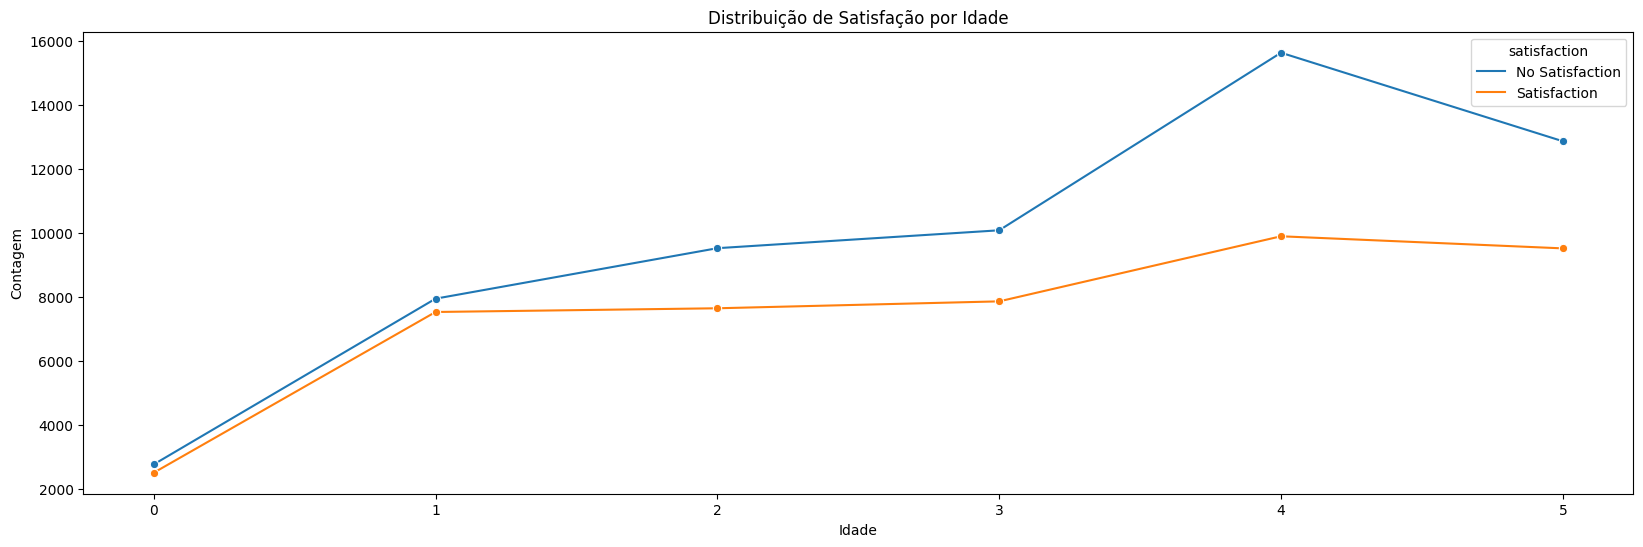

In [147]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='open/close_time_convenient', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

### 1.8.9 Column - easy_of_online_shopping

In [174]:
df1['easy_of_online_shopping'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [175]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'easy_of_online_shopping', 'satisfaction']].groupby(['easy_of_online_shopping', 'satisfaction']).count().reset_index()
df_aux.columns = ['easy_of_online_shopping', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,easy_of_online_shopping,satisfaction,count
0,0,No Satisfaction,1507
1,0,Satisfaction,2980
2,1,No Satisfaction,10935
3,1,Satisfaction,6590
4,2,No Satisfaction,16720
5,2,Satisfaction,7301
6,3,No Satisfaction,16912
7,3,Satisfaction,7537
8,4,No Satisfaction,9180
9,4,Satisfaction,10391


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


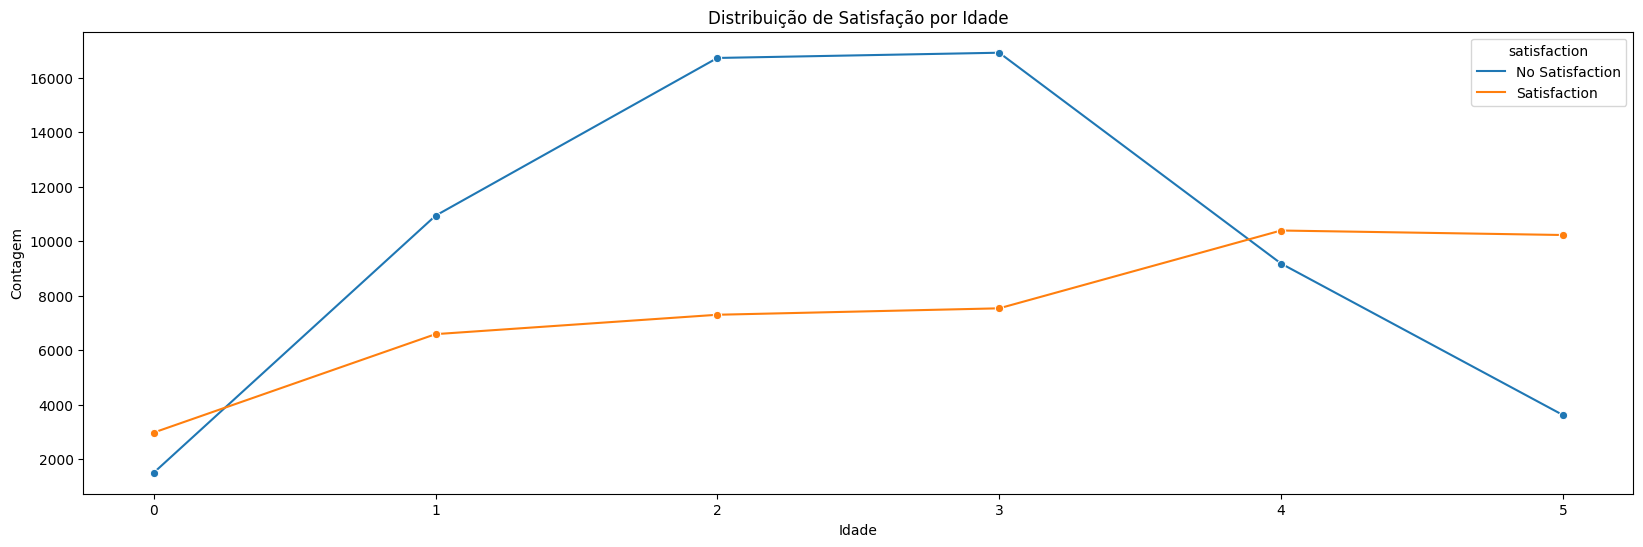

In [176]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='easy_of_online_shopping', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.10 Column - store_location

In [200]:
df1['store_location'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [201]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'store_location', 'satisfaction']].groupby(['store_location', 'satisfaction']).count().reset_index()
df_aux.columns = ['store_location', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,store_location,satisfaction,count
0,0,Satisfaction,1
1,1,No Satisfaction,8859
2,1,Satisfaction,8703
3,2,No Satisfaction,10494
4,2,Satisfaction,8965
5,3,No Satisfaction,18655
6,3,Satisfaction,9922
7,4,No Satisfaction,14936
8,4,Satisfaction,9490
9,5,No Satisfaction,5935


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


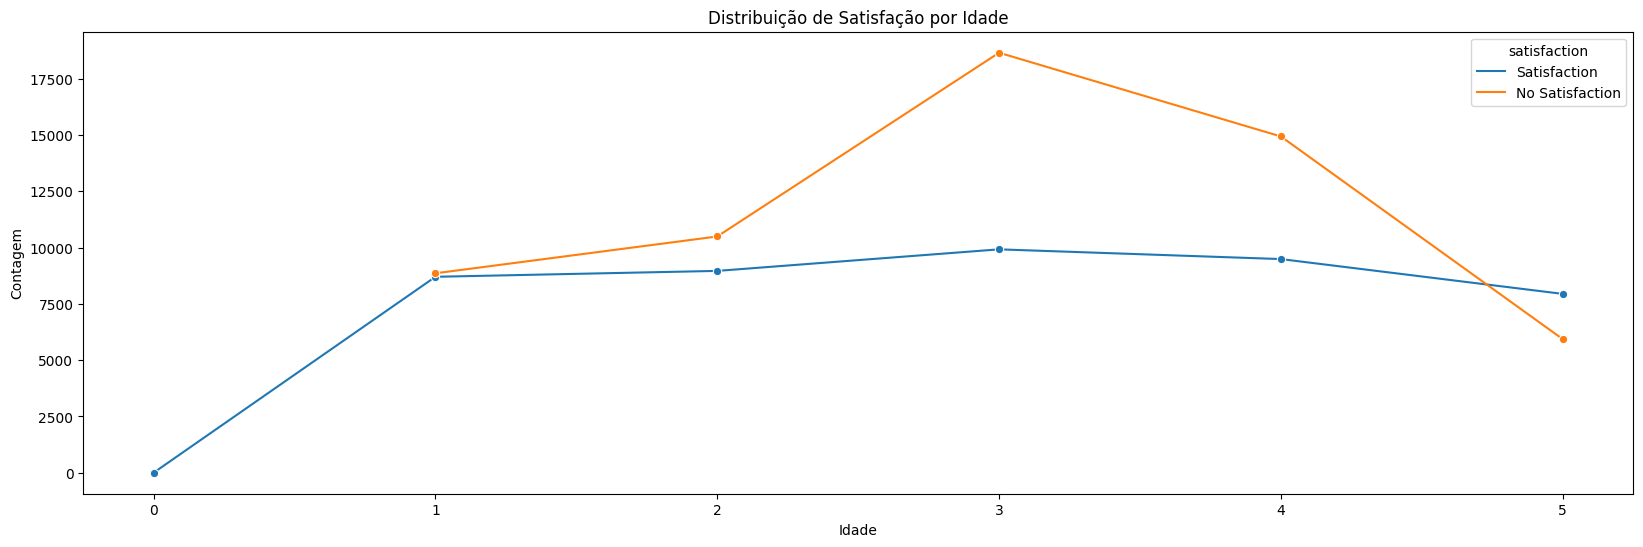

In [202]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='store_location', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.11 Column - toilet_cleaning

In [223]:
df1['toilet_cleaning'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [224]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'toilet_cleaning', 'satisfaction']].groupby(['toilet_cleaning', 'satisfaction']).count().reset_index()
df_aux.columns = ['toilet_cleaning', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,toilet_cleaning,satisfaction,count
0,0,No Satisfaction,57
1,0,Satisfaction,50
2,1,No Satisfaction,10269
3,1,Satisfaction,2568
4,2,No Satisfaction,13458
5,2,Satisfaction,8530
6,3,No Satisfaction,13461
7,3,Satisfaction,8839
8,4,No Satisfaction,11571
9,4,Satisfaction,12788


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


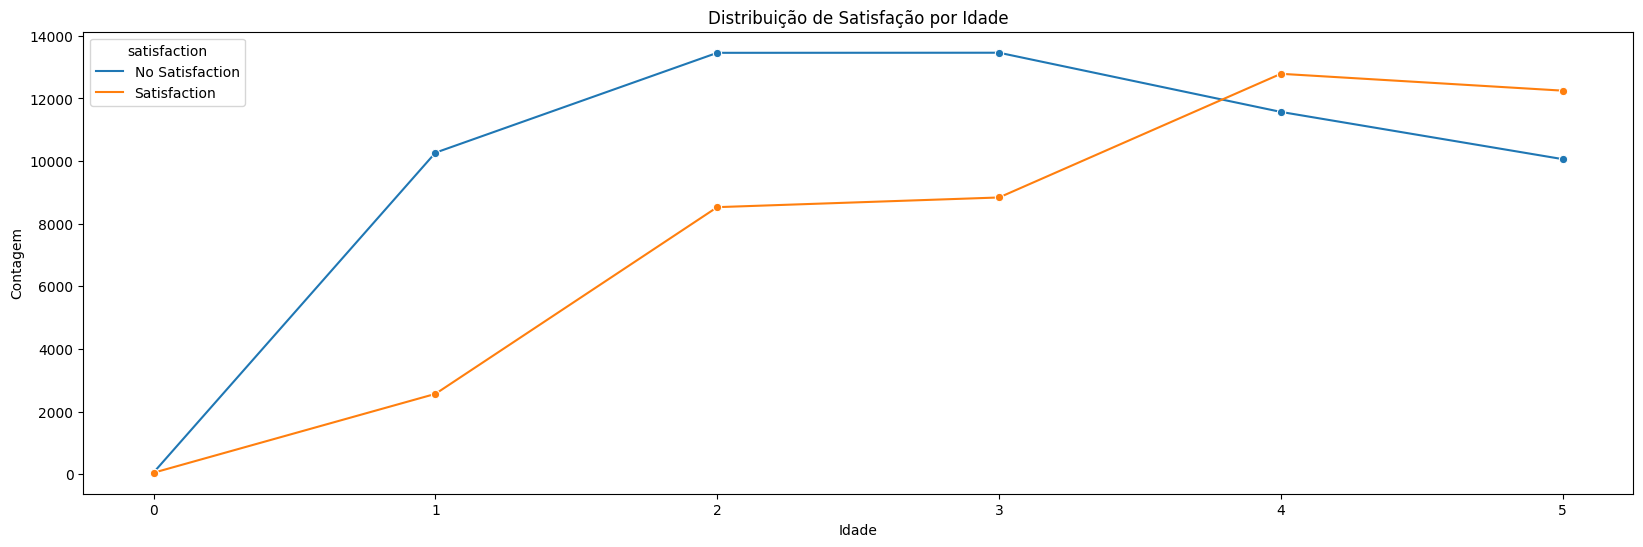

In [225]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='toilet_cleaning', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

### 1.8.12 Column - dressing_room

In [243]:
df1['dressing_room'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [244]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'dressing_room', 'satisfaction']].groupby(['dressing_room', 'satisfaction']).count().reset_index()
df_aux.columns = ['dressing_room', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,dressing_room,satisfaction,count
0,0,No Satisfaction,1077
1,0,Satisfaction,1351
2,1,No Satisfaction,9219
3,1,Satisfaction,1473
4,2,No Satisfaction,15486
5,2,Satisfaction,2019
6,3,No Satisfaction,18845
7,3,Satisfaction,2959
8,4,No Satisfaction,11596
9,4,Satisfaction,19166


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


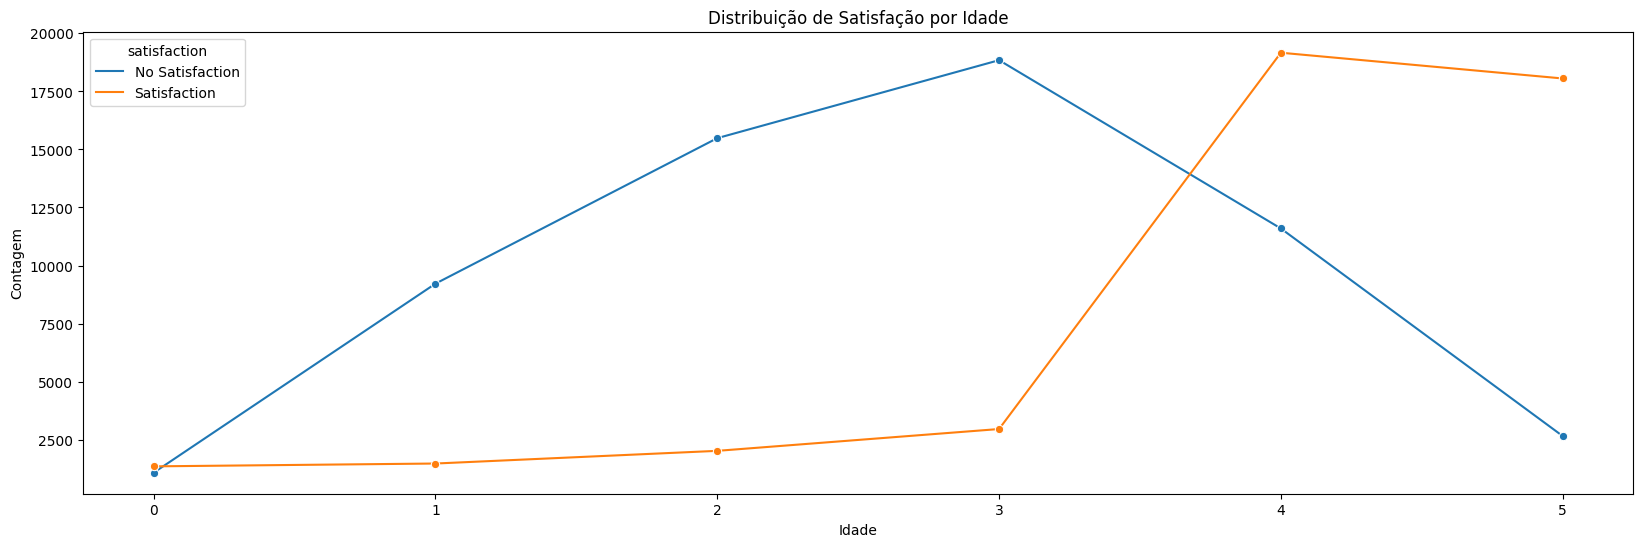

In [245]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='dressing_room', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.13 Column - waiting_room

In [246]:
df1['waiting_room'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [247]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'waiting_room', 'satisfaction']].groupby(['waiting_room', 'satisfaction']).count().reset_index()
df_aux.columns = ['waiting_room', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,waiting_room,satisfaction,count
0,0,No Satisfaction,1
1,1,No Satisfaction,9380
2,1,Satisfaction,2695
3,2,No Satisfaction,11558
4,2,Satisfaction,3339
5,3,No Satisfaction,14741
6,3,Satisfaction,3955
7,4,No Satisfaction,13940
8,4,Satisfaction,17825
9,5,No Satisfaction,9259


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


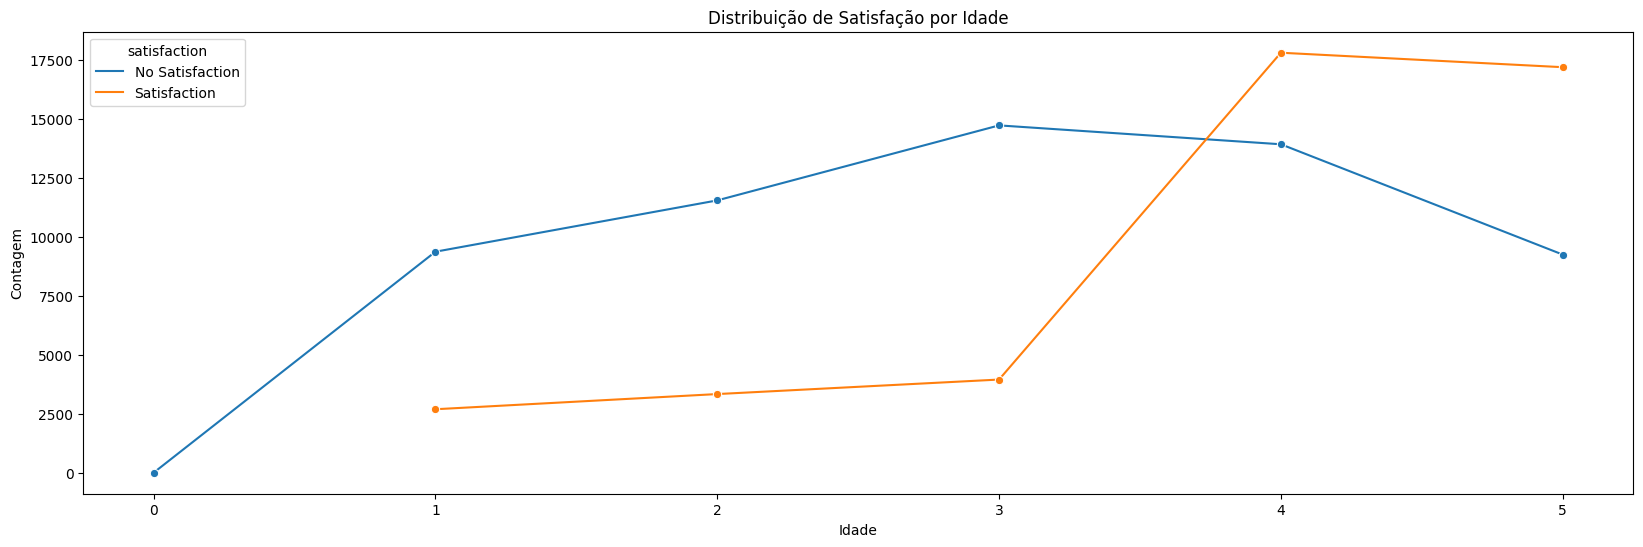

In [248]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='waiting_room', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.14 Column - kids_entertainment

In [251]:
df1['kids_entertainment'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [252]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'kids_entertainment', 'satisfaction']].groupby(['kids_entertainment', 'satisfaction']).count().reset_index()
df_aux.columns = ['kids_entertainment', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,kids_entertainment,satisfaction,count
0,0,No Satisfaction,14
1,1,No Satisfaction,10733
2,1,Satisfaction,1745
3,2,No Satisfaction,13875
4,2,Satisfaction,3762
5,3,No Satisfaction,13970
6,3,Satisfaction,5169
7,4,No Satisfaction,11423
8,4,Satisfaction,18000
9,5,No Satisfaction,8864


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


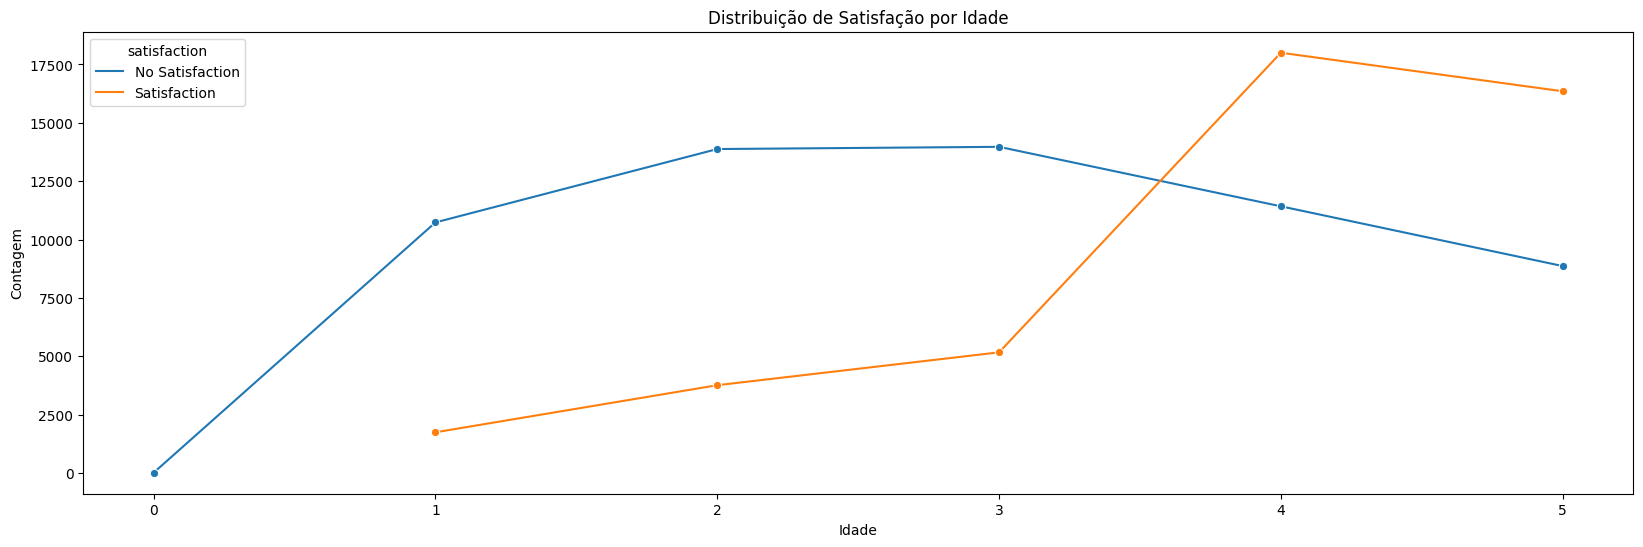

In [253]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='kids_entertainment', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.15 Column - seller_service

In [254]:
df1['seller_service'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [255]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'seller_service', 'satisfaction']].groupby(['seller_service', 'satisfaction']).count().reset_index()
df_aux.columns = ['seller_service', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,seller_service,satisfaction,count
0,0,No Satisfaction,3
1,1,No Satisfaction,9572
2,1,Satisfaction,2300
3,2,No Satisfaction,10927
4,2,Satisfaction,3754
5,3,No Satisfaction,15625
6,3,Satisfaction,7208
7,4,No Satisfaction,14296
8,4,Satisfaction,16571
9,5,No Satisfaction,8456


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


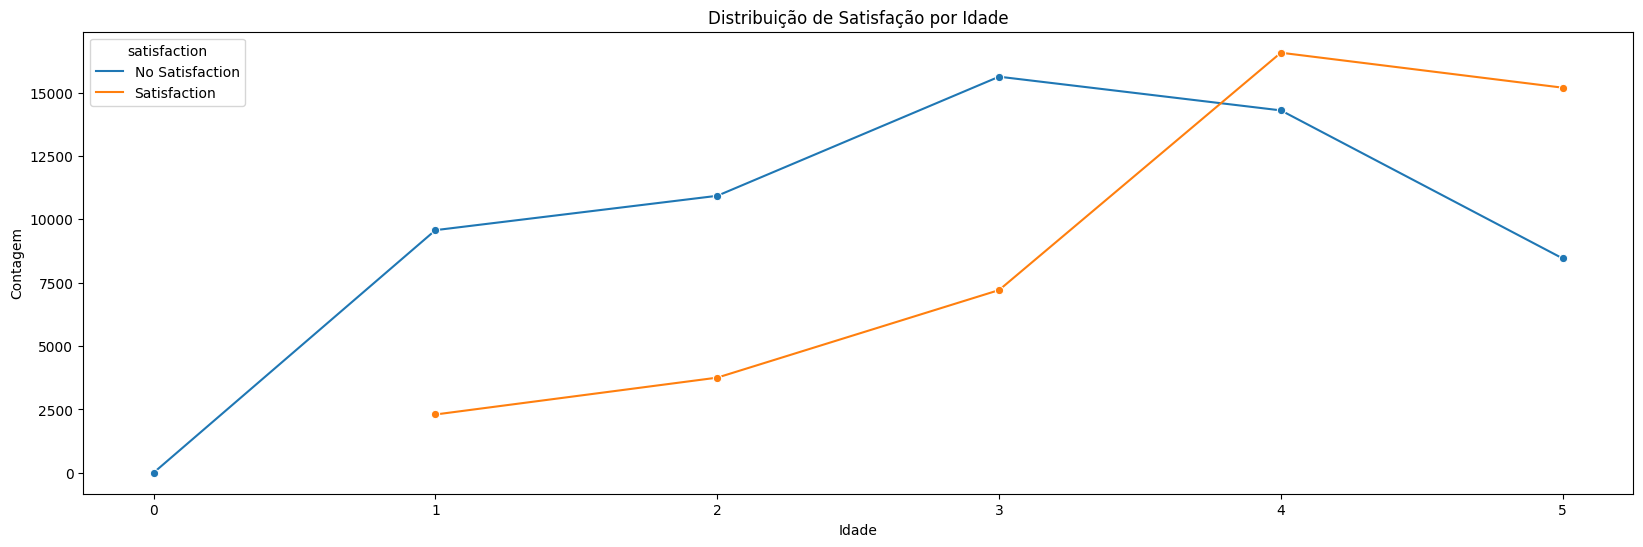

In [257]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='seller_service', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.16 Column - showroom

In [258]:
df1['showroom'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [259]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'showroom', 'satisfaction']].groupby(['showroom', 'satisfaction']).count().reset_index()
df_aux.columns = ['showroom', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,showroom,satisfaction,count
0,0,No Satisfaction,306
1,0,Satisfaction,166
2,1,No Satisfaction,8253
3,1,Satisfaction,2100
4,2,No Satisfaction,14162
5,2,Satisfaction,5363
6,3,No Satisfaction,14623
7,3,Satisfaction,5475
8,4,No Satisfaction,12025
9,4,Satisfaction,16764


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


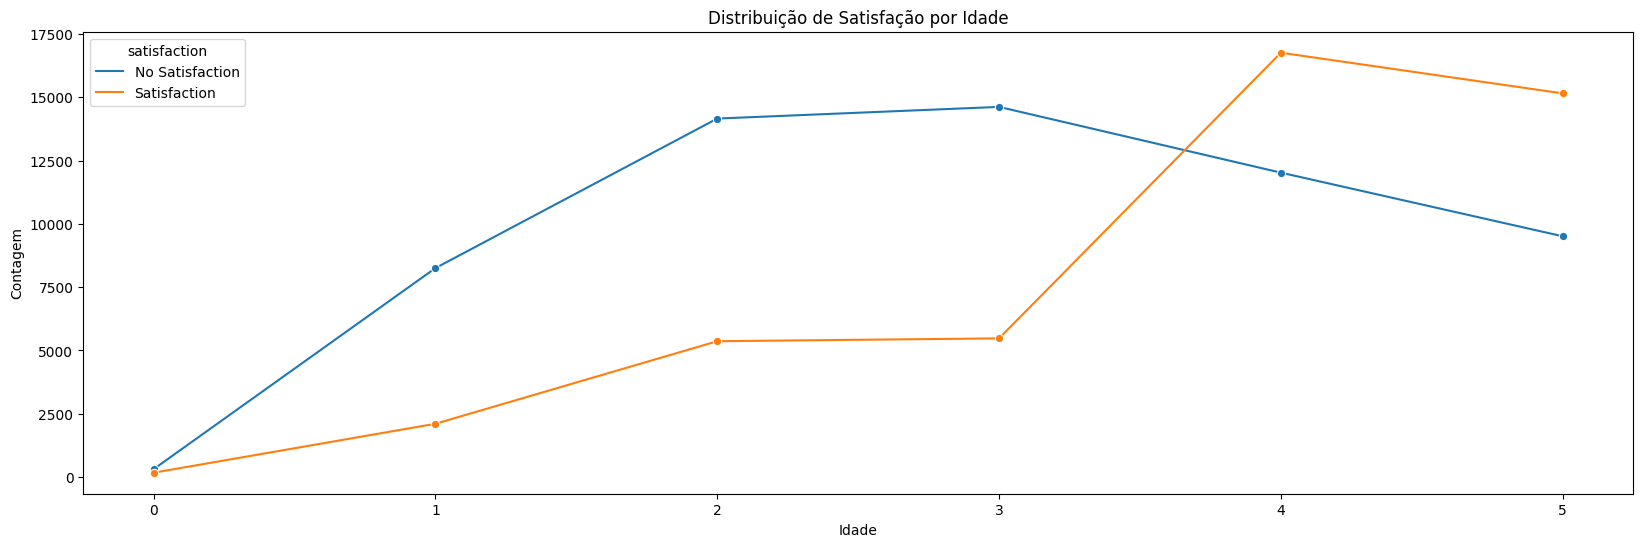

In [260]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='showroom', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.17 Column - self-store

In [261]:
df1['self-store'].sort_values().unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [262]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'self-store', 'satisfaction']].groupby(['self-store', 'satisfaction']).count().reset_index()
df_aux.columns = ['self-store', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,self-store,satisfaction,count
0,1,No Satisfaction,5083
1,1,Satisfaction,2154
2,2,No Satisfaction,8117
3,2,Satisfaction,3404
4,3,No Satisfaction,15766
5,3,Satisfaction,4866
6,4,No Satisfaction,19405
7,4,Satisfaction,17978
8,5,No Satisfaction,10508
9,5,Satisfaction,16623


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


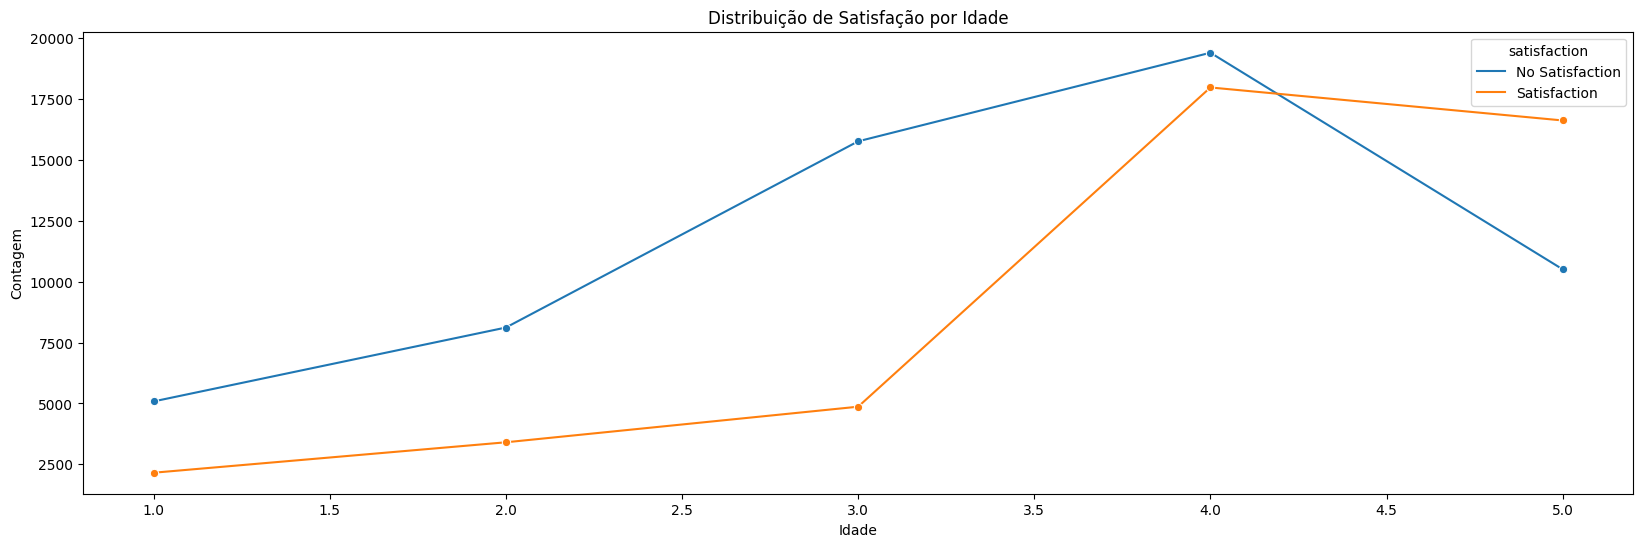

In [263]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='self-store', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.18 Column - purchase_service

In [264]:
df1['purchase_service'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [265]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'purchase_service', 'satisfaction']].groupby(['purchase_service', 'satisfaction']).count().reset_index()
df_aux.columns = ['purchase_service', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,purchase_service,satisfaction,count
0,0,No Satisfaction,1
1,1,No Satisfaction,9806
2,1,Satisfaction,3084
3,2,No Satisfaction,9640
4,2,Satisfaction,3253
5,3,No Satisfaction,15694
6,3,Satisfaction,12752
7,4,No Satisfaction,15692
8,4,Satisfaction,13363
9,5,No Satisfaction,8046


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


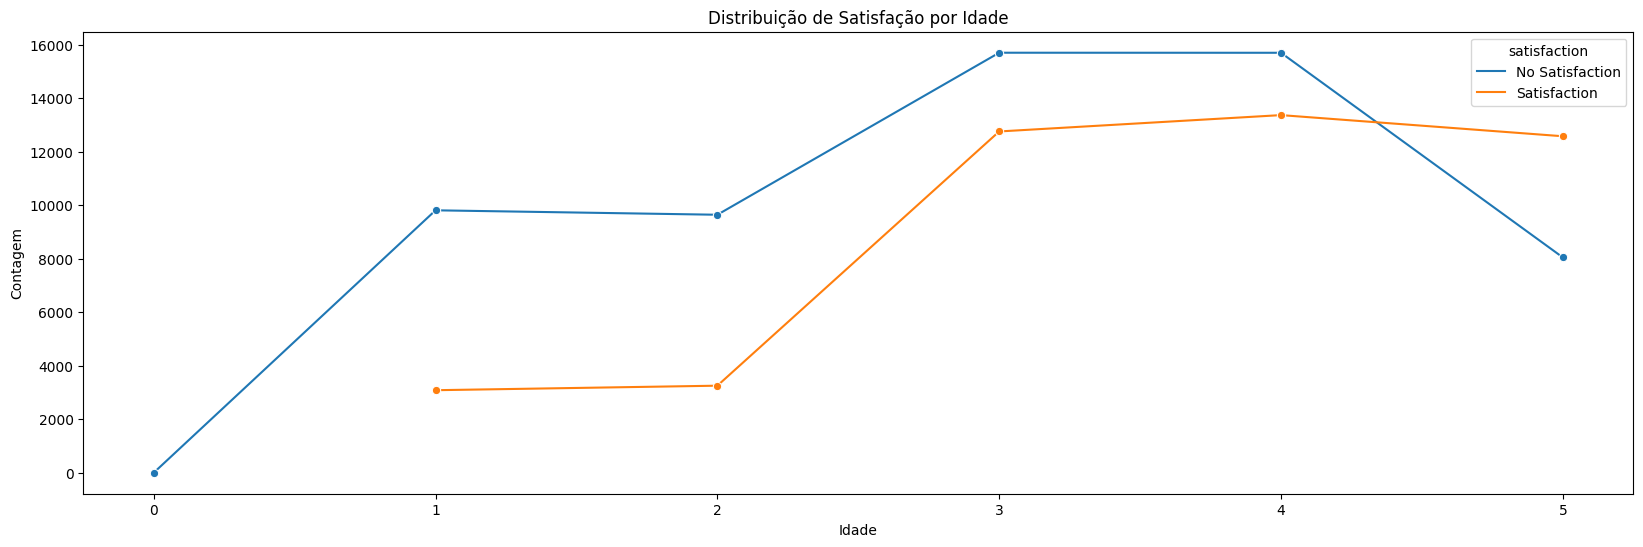

In [266]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='purchase_service', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.19 Column - store_service

In [267]:
df1['store_service'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [268]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'store_service', 'satisfaction']].groupby(['store_service', 'satisfaction']).count().reset_index()
df_aux.columns = ['store_service', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,store_service,satisfaction,count
0,0,No Satisfaction,3
1,1,No Satisfaction,5030
2,1,Satisfaction,2054
3,2,No Satisfaction,8006
4,2,Satisfaction,3451
5,3,No Satisfaction,15448
6,3,Satisfaction,4851
7,4,No Satisfaction,19816
8,4,Satisfaction,18129
9,5,No Satisfaction,10576


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


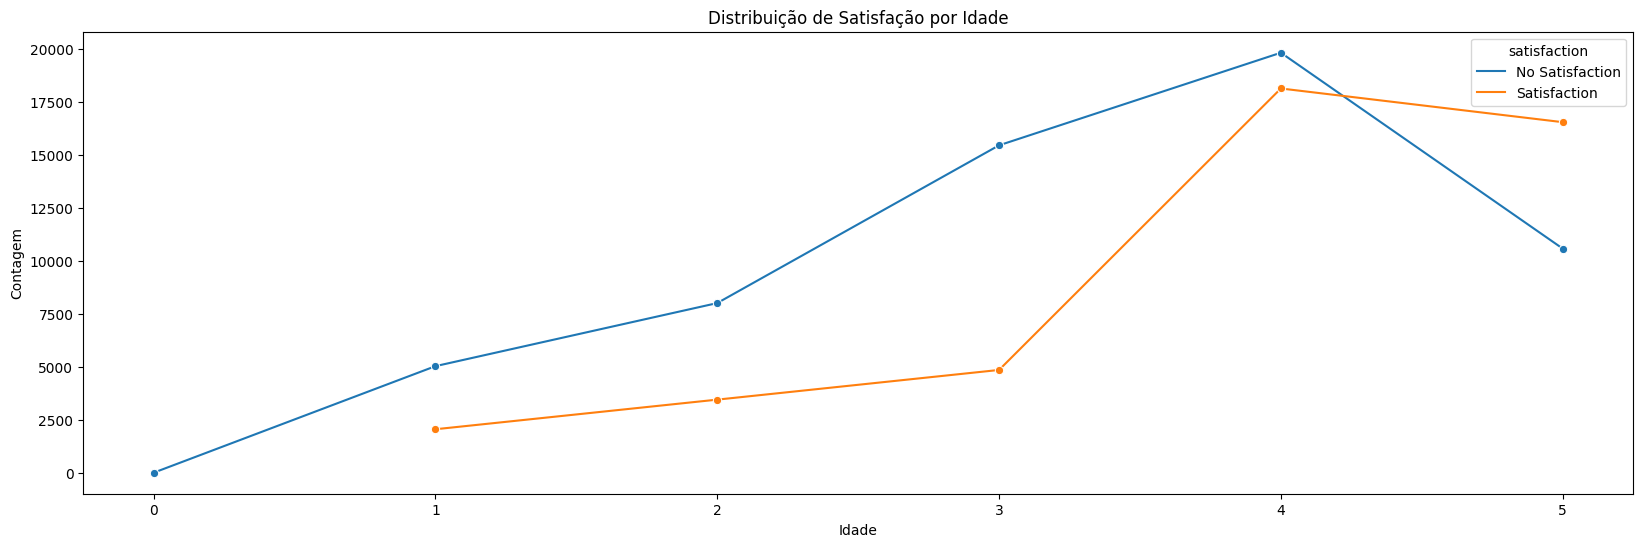

In [269]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='store_service', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.20 Column - cleanliness

In [270]:
df1['cleanliness'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [271]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'cleanliness', 'satisfaction']].groupby(['cleanliness', 'satisfaction']).count().reset_index()
df_aux.columns = ['cleanliness', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,cleanliness,satisfaction,count
0,0,No Satisfaction,12
1,1,No Satisfaction,10705
2,1,Satisfaction,2613
3,2,No Satisfaction,12696
4,2,Satisfaction,3436
5,3,No Satisfaction,13961
6,3,Satisfaction,10613
7,4,No Satisfaction,12629
8,4,Satisfaction,14550
9,5,No Satisfaction,8876


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


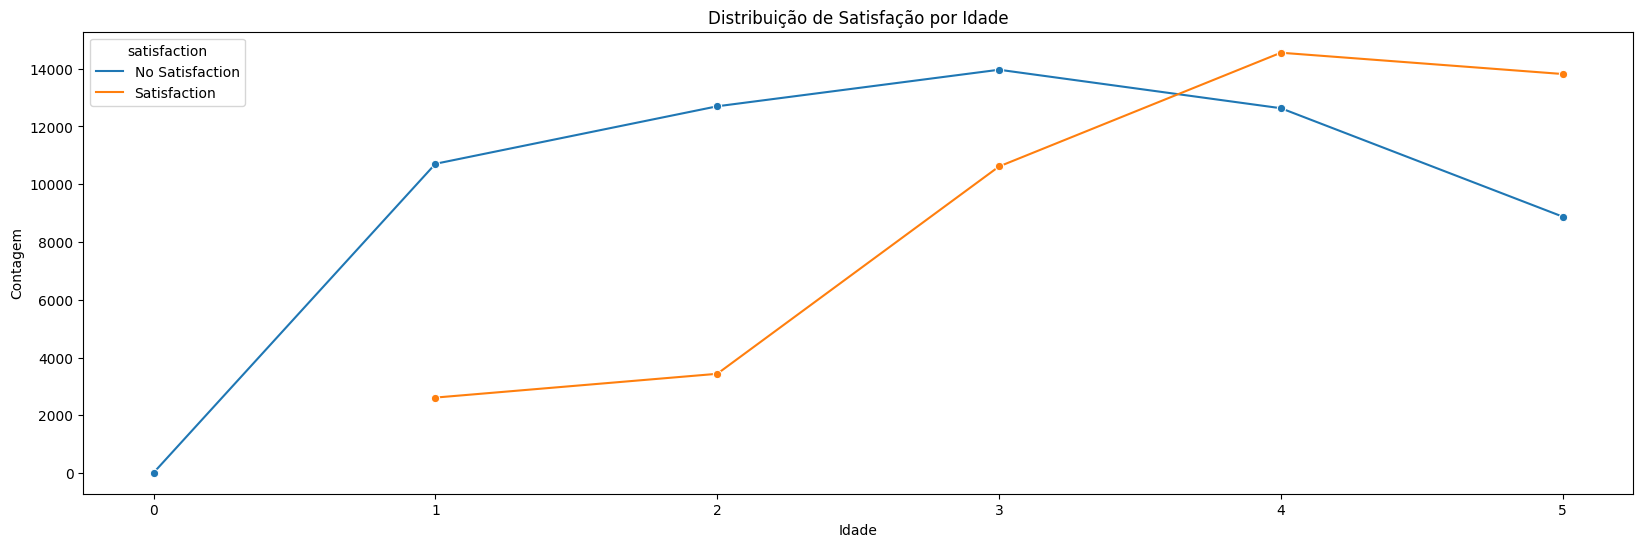

In [272]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='cleanliness', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.21 Column - carrier_delay_in_minutes

In [276]:
df1['carrier_delay_in_minutes'].sort_values().unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

In [273]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'carrier_delay_in_minutes', 'satisfaction']].groupby(['carrier_delay_in_minutes', 'satisfaction']).count().reset_index()
df_aux.columns = ['carrier_delay_in_minutes', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,carrier_delay_in_minutes,satisfaction,count
0,0,No Satisfaction,31826
1,0,Satisfaction,26842
2,1,No Satisfaction,1608
3,1,Satisfaction,1340
4,2,No Satisfaction,1217
...,...,...,...
751,933,Satisfaction,1
752,978,No Satisfaction,1
753,1017,Satisfaction,1
754,1305,Satisfaction,1


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


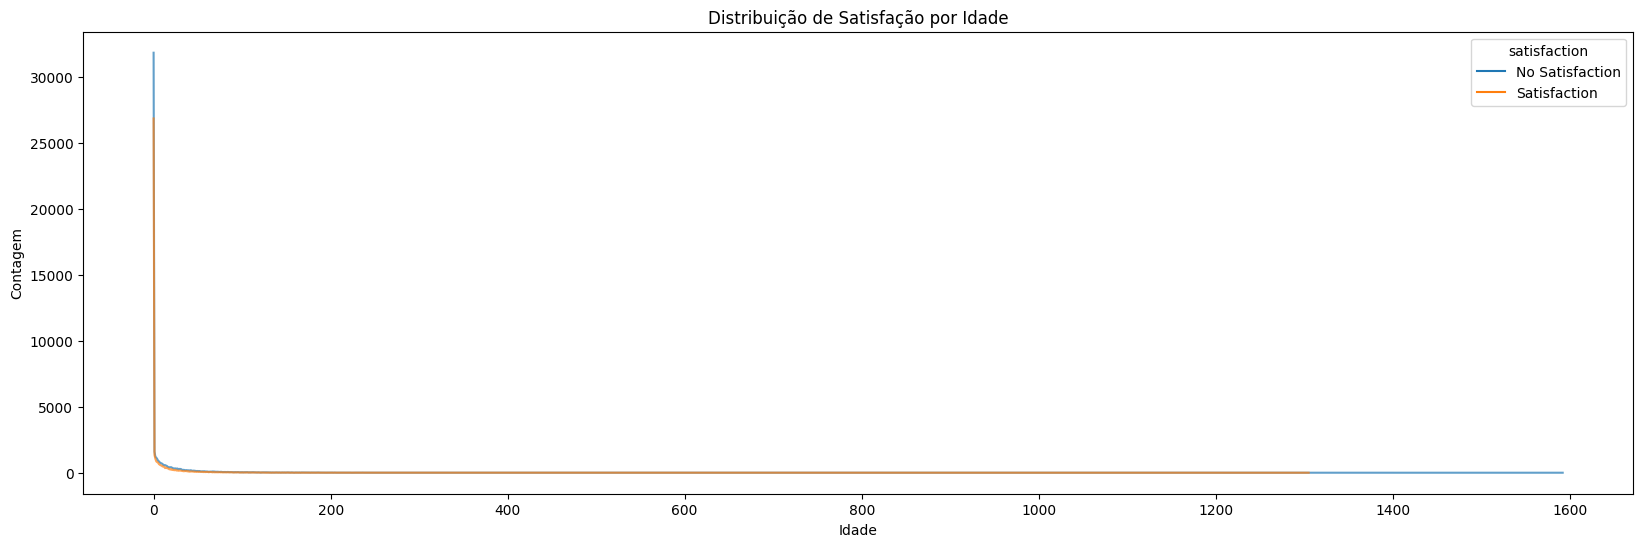

In [277]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
# ax = sns.lineplot(x='carrier_delay_in_minutes', y='count', hue='satisfaction', data=df_aux, marker='o')
ax = sns.lineplot(x='carrier_delay_in_minutes', y='count', hue='satisfaction', data=df_aux, alpha=0.7)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


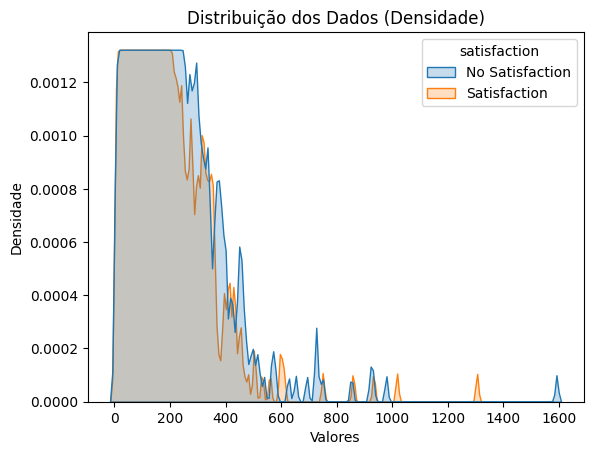

In [278]:
sns.kdeplot(
    data=df_aux,
    x='carrier_delay_in_minutes',
    hue='satisfaction',
    fill=True,
    color='skyblue',
    bw_adjust=.1
    # multiple='stack',
    # common_norm=False
)

plt.title('Distribuição dos Dados (Densidade)')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()

### 1.8.22 Column - delivery_delay_in_minutes

In [282]:
df1['delivery_delay_in_minutes'].sort_values().unique()

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01,
       3.000e+01, 3.100e+01, 3.200e+01, 3.300e+01, 3.400e+01, 3.500e+01,
       3.600e+01, 3.700e+01, 3.800e+01, 3.900e+01, 4.000e+01, 4.100e+01,
       4.200e+01, 4.300e+01, 4.400e+01, 4.500e+01, 4.600e+01, 4.700e+01,
       4.800e+01, 4.900e+01, 5.000e+01, 5.100e+01, 5.200e+01, 5.300e+01,
       5.400e+01, 5.500e+01, 5.600e+01, 5.700e+01, 5.800e+01, 5.900e+01,
       6.000e+01, 6.100e+01, 6.200e+01, 6.300e+01, 6.400e+01, 6.500e+01,
       6.600e+01, 6.700e+01, 6.800e+01, 6.900e+01, 7.000e+01, 7.100e+01,
       7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01, 7.600e+01, 7.700e+01,
       7.800e+01, 7.900e+01, 8.000e+01, 8.100e+01, 

In [283]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'delivery_delay_in_minutes', 'satisfaction']].groupby(['delivery_delay_in_minutes', 'satisfaction']).count().reset_index()
df_aux.columns = ['delivery_delay_in_minutes', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

,delivery_delay_in_minutes,satisfaction,count
0,0.0,No Satisfaction,30662
1,0.0,Satisfaction,27497
2,1.0,No Satisfaction,1160
3,1.0,Satisfaction,1051
4,2.0,No Satisfaction,1092
...,...,...,...
773,952.0,No Satisfaction,1
774,970.0,No Satisfaction,1
775,1011.0,Satisfaction,1
776,1280.0,Satisfaction,1


d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


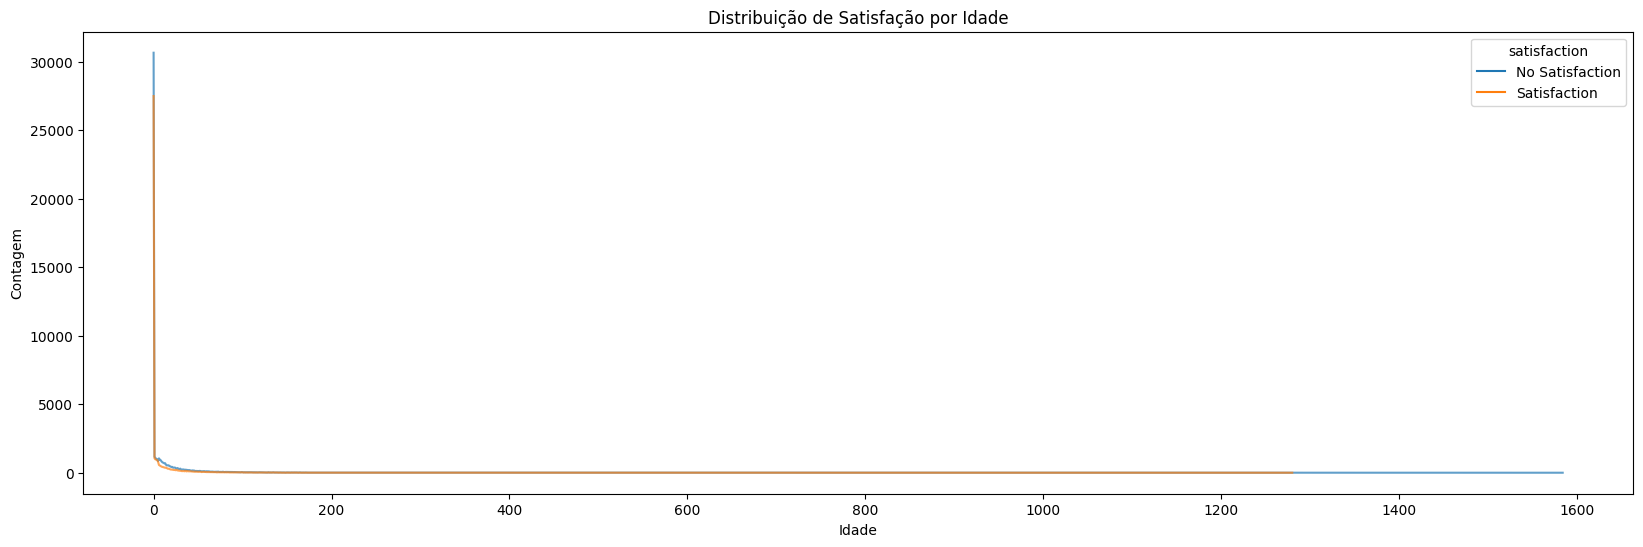

In [284]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
# ax = sns.lineplot(x='delivery_delay_in_minutes', y='count', hue='satisfaction', data=df_aux, marker='o')
ax = sns.lineplot(x='delivery_delay_in_minutes', y='count', hue='satisfaction', data=df_aux, alpha=0.7)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

d:\Kaggle\InStyle\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


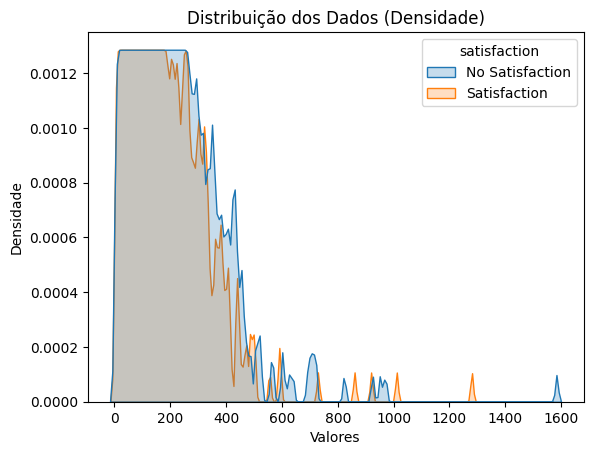

In [286]:
sns.kdeplot(
    data=df_aux,
    x='delivery_delay_in_minutes',
    hue='satisfaction',
    fill=True,
    color='skyblue',
    bw_adjust=.1
    # multiple='stack',
    # common_norm=False
)

plt.title('Distribuição dos Dados (Densidade)')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()

# 2.0 Feature Engineering

In [ ]:
df2 = df1.copy()

## 2.1 New colum store_location_

In [ ]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.2 New colum customer_type_

In [ ]:
df2['customer_type_'] = (df2['store_distance'] * 0.8) + (df2['age'] * .2)

In [ ]:
# df2['age'].min()

## 2.8 Verificaty satisfaction correlation

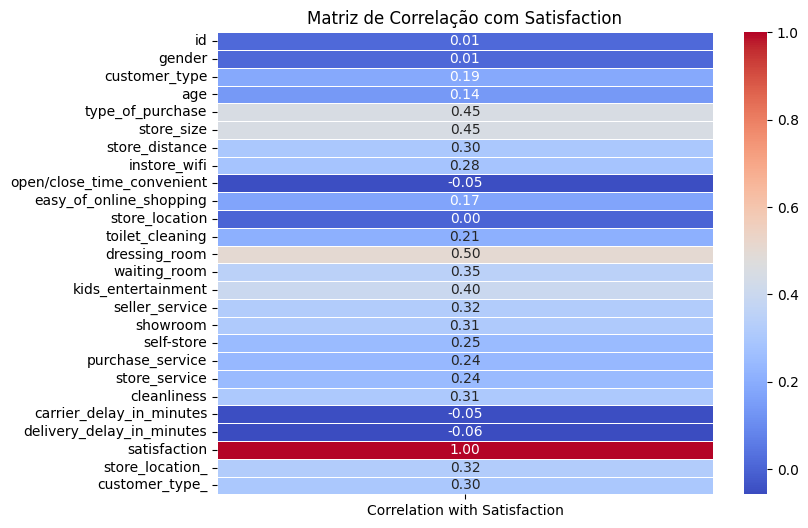

In [ ]:
# Assuming that 'satisfaction' is the column of interest in your DataFrame df2.
correlation_matrix = df2.corrwith(df2['satisfaction'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with Satisfaction']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com Satisfaction')
plt.show()

# 'type_of_purchase', 'store_size', 'store_distance', 'dressing_room', 'waiting_room', 'kids_entertainment', 'seller_service', 'showroom', 'cleanliness', 'store_location_', 'customer_type_'

## 2.3 New colum store_location_

In [ ]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.4 New colum store_location_

In [ ]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.5 New colum store_location_

In [ ]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.6 New colum store_location_

In [ ]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.7 New colum store_location_

In [ ]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

# 3.0 Data Filtering

# 4.0 EDA

# 5.0 Data preparation

In [ ]:
df5 = df2.copy()

In [ ]:
X = df5.drop( 'satisfaction', axis=1 )
y = df5['satisfaction'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1 )

# 6.0. Feature Selection

# 7.0 Machine Learning

In [ ]:
df7 = df5.copy()

In [ ]:
cols_selected = ['type_of_purchase', 'store_size', 'store_distance', 'dressing_room', 'waiting_room', 'kids_entertainment', 'seller_service', 'showroom', 'cleanliness', 'store_location_', 'customer_type_']

x_train = df5[ cols_selected ]
x_val = x_validation[ cols_selected ]
y_val = y_validation.copy()